In [6]:
#순환 신경망. 시신경 데이터를 이용함
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [11]:
from tensorflow.keras.datasets import imdb
(X_tn0,y_tn0),(X_te0,y_test) = imdb.load_data(num_words=2000)

In [12]:
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [13]:
X_train = X_tn0[:20000]#트레이닝 피쳐
print(X_train.shape)

y_train = y_tn0[:20000]#트레이닝 타겟
print(y_train.shape)

X_valid = X_tn0[20000:25000]#벨리데이션 피쳐
print(X_valid.shape)
y_valid = y_tn0[20000:25000]#벨리데이션 타겟
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


In [15]:
print(X_train[0]) #보니까 숫자 리스트임. 오리지널 데이터는 이미 단어를 숫자로 매핑해 영 단어가 해당하는 숫자로 변환된 것.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [16]:
print(len(X_train[0]))
print(len(X_train[1]))

218
189


In [20]:
print(set(y_test)) #이진분류
print(len(set(y_test))) #클래스 2개

{0, 1}
2


In [25]:
#피처 데이터 변경
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train,maxlen=100)
print(X_train.shape)

X_valid = sequence.pad_sequences(X_valid,maxlen=100)
print(X_valid.shape)

X_test = sequence.pad_sequences(X_te0,maxlen=100)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


In [27]:
#LSTM 모형
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=2000,output_dim=100))
model.add(Conv1D(50,kernel_size=3,
                padding='valid',
                activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, None, 50)          15050     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 50)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

In [28]:
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [30]:
hist = model.fit(X_train,y_train,
                batch_size=100,
                epochs=10,
                validation_data=(X_valid,y_valid))

Epoch 1/10


2024-01-25 15:29:50.179265: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


200/200 [==============================] - 7s 34ms/step - loss: 0.4854 - accuracy: 0.7482 - val_loss: 0.3852 - val_accuracy: 0.8292
Epoch 2/10
200/200 [==============================] - 7s 35ms/step - loss: 0.3415 - accuracy: 0.8536 - val_loss: 0.3730 - val_accuracy: 0.8320
Epoch 3/10
200/200 [==============================] - 7s 36ms/step - loss: 0.2973 - accuracy: 0.8769 - val_loss: 0.3661 - val_accuracy: 0.8348
Epoch 4/10
200/200 [==============================] - 7s 37ms/step - loss: 0.2538 - accuracy: 0.8997 - val_loss: 0.3945 - val_accuracy: 0.8342
Epoch 5/10
200/200 [==============================] - 8s 38ms/step - loss: 0.1843 - accuracy: 0.9325 - val_loss: 0.5045 - val_accuracy: 0.8112
Epoch 6/10
200/200 [==============================] - 8s 39ms/step - loss: 0.1158 - accuracy: 0.9603 - val_loss: 0.4788 - val_accuracy: 0.8194
Epoch 7/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0703 - accuracy: 0.9776 - val_loss: 0.5092 - val_accuracy: 0.7982
Epoch 8/10

In [31]:
print(model.evaluate(X_train,y_train)[1])
print(model.evaluate(X_valid,y_valid)[1])
print(model.evaluate(X_test,y_test)[1])

625/625 [==============================] - 3s 5ms/step - loss: 0.0095 - accuracy: 0.9990
0.9989500045776367
157/157 [==============================] - 1s 5ms/step - loss: 0.7935 - accuracy: 0.8106
0.8105999827384949
782/782 [==============================] - 4s 5ms/step - loss: 0.7521 - accuracy: 0.8233
0.8233199715614319


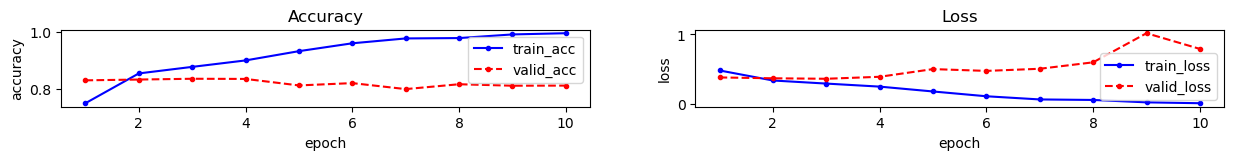

In [34]:
import numpy as np
epoch = np.arange(1,11)
acc_train = hist.history['accuracy']
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_valid = hist.history['val_loss']

import matplotlib.pyplot as plt
plt.figure(figsize=(15,1))
plt.subplot(121)
plt.plot(epoch,acc_train,'b',
        marker='.',
        label='train_acc')
plt.plot(epoch,acc_valid,'r--',
        marker='.',
        label='valid_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epoch,loss_train,'b',
        marker='.',
        label='train_loss')
plt.plot(epoch,loss_valid,'r--',
        marker='.',
        label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()